# This jupyter notebook analyzes data about ramen.

In [ ]:
# KEY TAKEAWAYS

# 2,580 total reviews. 
# Reviews are from 38 different countries.
# Average ramen rating is 3.6. 
# No correlation between the number of ratings a brand or style of ramen received and how high its rating was.
# Ramen that are instant, spicy and flavorful, and made up of either beef or chicken are the ones that were the most rated.
# Nissin is the most popular brand of ramen that customers bought.
# Packed ramen is the most popular style of ramen that customers consumed.
# Asia is the most common region for ramen ratings. 
# The Middle East and Africa are the least common regions for ramen ratings.

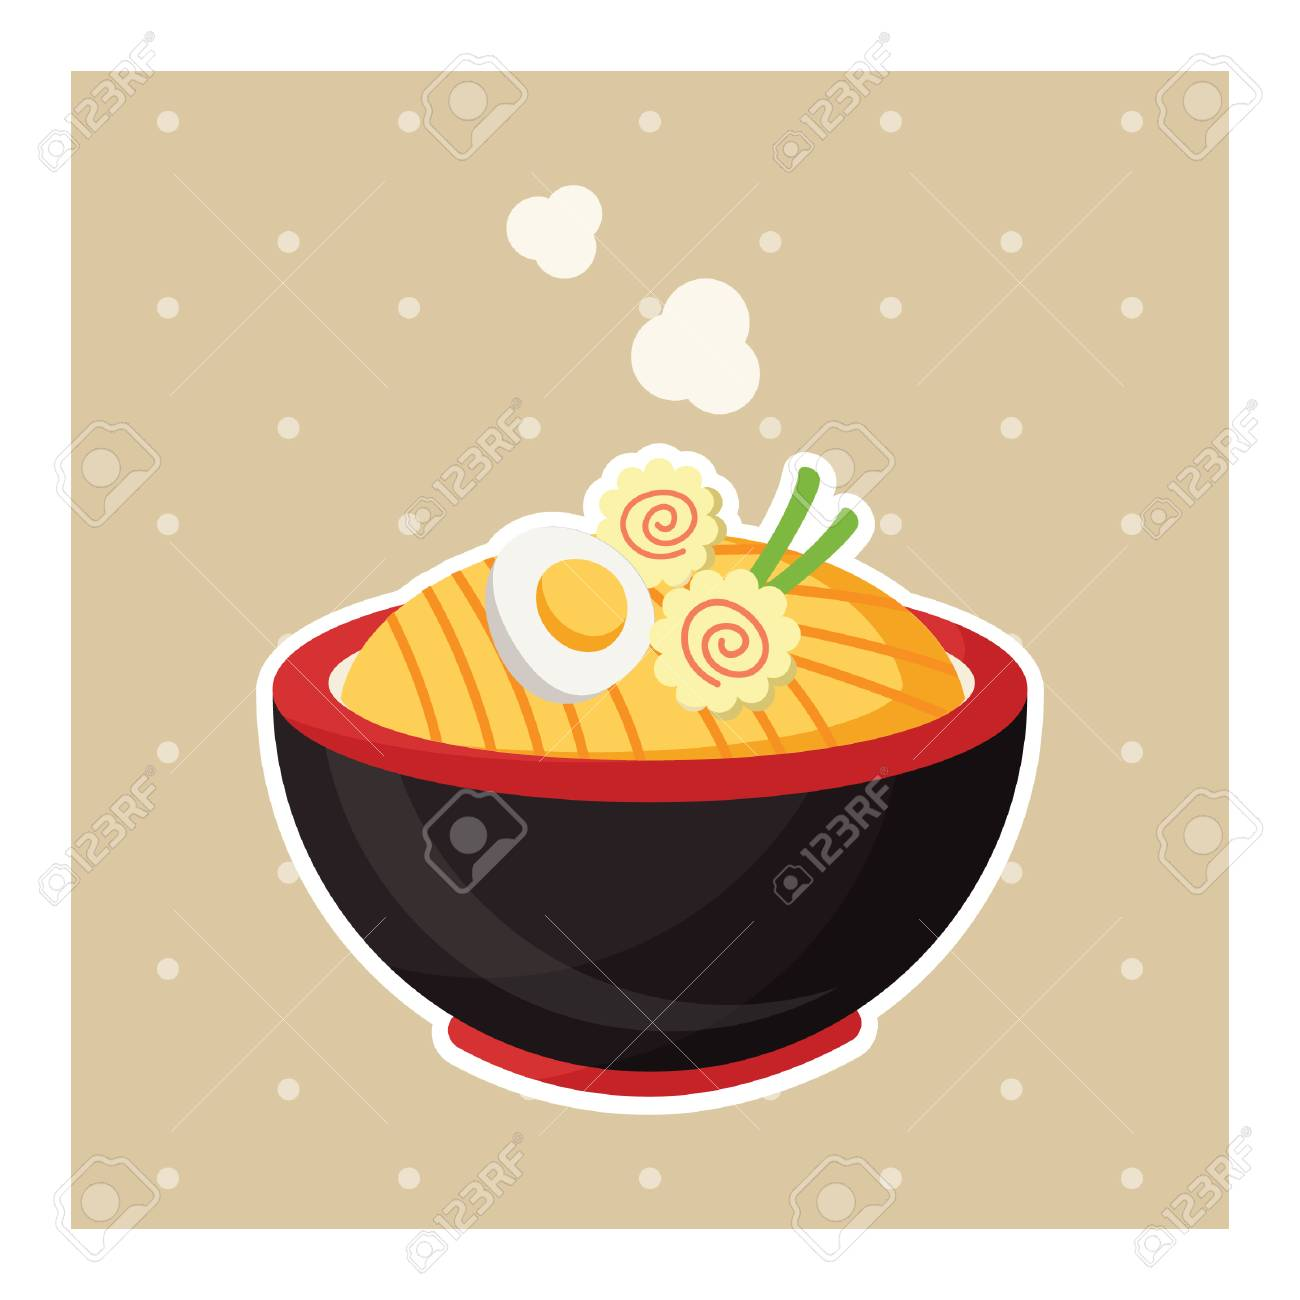

In [52]:
from IPython.display import Image
Image(filename='ramen.jpg', width = 500, height = 200)

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [54]:
df = pd.read_csv('Ramen.csv', header=0,encoding = 'unicode_escape')
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [55]:
df.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [56]:
# Stars column has a the word Unrated in it. That should be removed.

df['Stars'].value_counts()

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
5.0         10
1.25        10
3.50         9
5.00         7
4.00         6
4.3          4
4.0          3
3.8          3
4.50         3
Unrated      3
3.0          2
4.125        2
2.8          2
2.3          2
3.1          2
2.9          2
1.1          2
3.65         1
3.7          1
2.85         1
3.00         1
3.3          1
3.6          1
3.4          1
0.9          1
0.1          1
2.125        1
2.1          1
3.125        1
0.75         1
3.2          1
1.8          1
Name: Stars, dtype: int64

In [57]:
# Replacing the word Unrated in the Stars column with a NaN value.

df = df.replace({'Stars':{'Unrated':np.nan}})
df['Stars'].value_counts()

4        384
5        369
3.75     350
3.5      326
3        173
3.25     170
4.25     143
4.5      132
2.75      85
2         68
2.5       67
4.75      64
1.5       37
1.75      27
1         26
0         26
2.25      21
0.5       14
0.25      11
1.25      10
5.0       10
3.50       9
5.00       7
4.00       6
4.3        4
3.8        3
4.0        3
4.50       3
4.125      2
2.9        2
3.0        2
2.8        2
2.3        2
3.1        2
1.1        2
3.6        1
1.8        1
3.4        1
3.3        1
0.1        1
2.125      1
2.1        1
3.125      1
3.2        1
0.9        1
3.00       1
2.85       1
3.65       1
3.7        1
0.75       1
Name: Stars, dtype: int64

In [58]:
df['Stars'] = df.Stars.astype('float')

In [59]:
# 355 brands of ramen. Nissin is the most popular brand of ramen that customers bought.
# 7 styles of ramen. Pack is the most popular brand of ramen.
# Reviewers are from 38 different countries. Japan is the top source of reviews.
# Average rating is 3.6

df.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2577.000000,41
unique,NaN,355,2413,7,38,NaN,38
top,NaN,Nissin,Beef,Pack,Japan,NaN,\n
freq,NaN,381,7,1531,352,NaN,4
mean,1290.500000,NaN,NaN,NaN,NaN,3.654676,NaN
std,744.926171,NaN,NaN,NaN,NaN,1.015331,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,645.750000,NaN,NaN,NaN,NaN,3.250000,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,3.750000,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,4.250000,NaN


In [60]:
# Replaced the value United States with USA.

df = df.replace({'Country':{'United States':'USA'}})

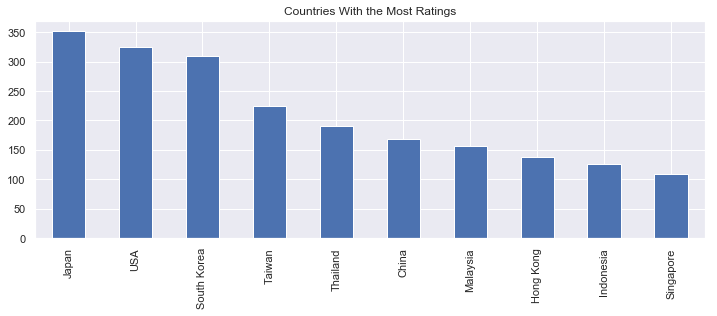

In [61]:
# Japan, USA, and South Korea have the most ratings.

c_count = df['Country'].value_counts().head(10)
plt.subplots(figsize=(12,4))
c_count.plot.bar(title='Countries With the Most Ratings')
sns.set()
plt.show()

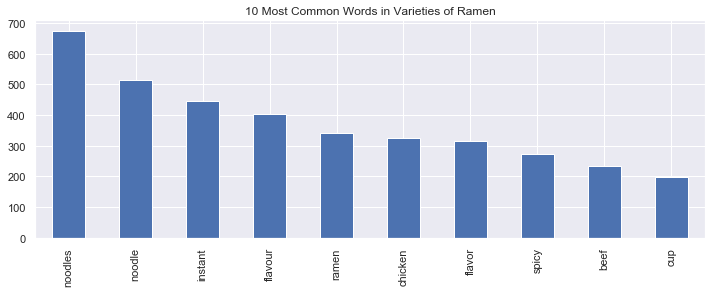

In [62]:
# 10 most popular words in the Variety column.
# Ramen that are instant, spicy and flavorful, and made up of either beef or chicken are the ones that were the most rated.

a = pd.Series(' '.join(df['Variety']).lower().split()).value_counts().head(10)
plt.subplots(figsize=(12,4))
a.plot.bar(title='10 Most Common Words in Varieties of Ramen')
sns.set()
plt.show()

In [63]:
# Since there are 38 different countries, it would be easier to analyze them by country region.
# Country Regions = Africa, Asia, Europe, Middle East, North America, Oceania, South America, 

df['Country_Region'] = df['Country']
df['Country'].value_counts()
df.replace(to_replace={'Country_Region': 
{'Japan': 'Asia', 
 'USA': 'North America', 
 'South Korea': 'Asia', 
 'Taiwan': 'Asia',
 'Thailand': 'Asia',
 'China': 'Asia',
 'Malaysia': 'Asia',
 'Hong Kong': 'Asia',
 'Indonesia': 'Asia',
 'Singapore': 'Asia',
 'Vietnam': 'Asia',
 'UK': 'Europe',
 'Philippines':'Asia',
 'Canada': 'North America',
 'India': 'Asia',
 'Germany': 'Europe',
 'Mexico': 'South America',
 'Australia': 'Oceania',
 'Netherlands': 'Europe',
 'Nepal': 'Asia',
 'Myanmar': 'Asia',
 'Pakistan': 'Asia',
 'Hungary': 'Asia',
 'Bangladesh': 'Asia',
 'Colombia': 'South America',
 'Cambodia': 'Asia',
 'Brazil': 'South America',
 'Fiji': 'Oceania',
 'Poland': 'Europe',
 'Holland': 'Europe',
 'Dubai': 'Middle East',
 'Sarawak': 'Asia',
 'Sweden': 'Europe',
 'Estonia': 'Europe',
 'Ghana': 'Africa',
 'Nigeria': 'Africa' ,
 'Finland': 'Europe'
 }},inplace=True)

df['Country_Region'].value_counts()

Asia             2020
North America     365
Europe            127
South America      36
Oceania            26
Africa              3
Middle East         3
Name: Country_Region, dtype: int64

Text(0.5, 0, 'Style of Ramen')

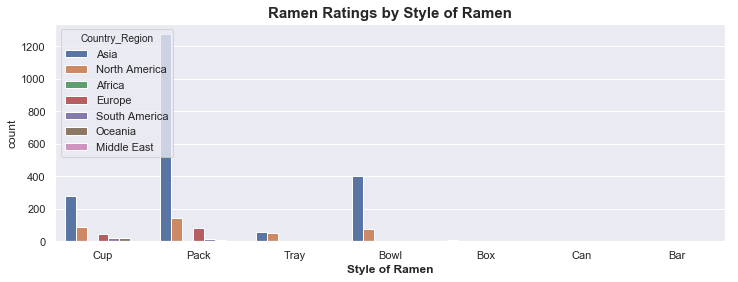

In [64]:
# Ramen that comes in a pack is the most popular style of ramen, followed by ramen in a bowl and ramen in a cup.
# Ramen retailers should consider discontinuing selling ramen in a box, can, and bar.

plt.subplots(figsize=(12,4))
sns.countplot(x='Style', data=df, hue='Country_Region')
plt.title('Ramen Ratings by Style of Ramen', fontweight = 'bold', fontsize=15)
plt.xlabel('Style of Ramen', fontweight='bold')

Text(0.5, 0, 'Style of Ramen')

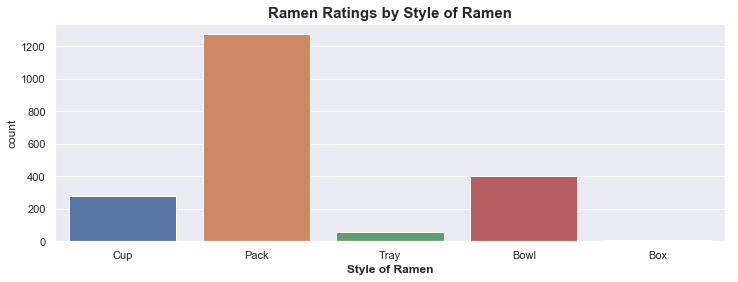

In [65]:
# In Asia, the most popular ramen styles are packed ramen, ramen in a bowl and a ramen in a cup.
# For the Asian market, ramen retailers should consider discontinuing selling ramen in a box and ramen in a tray.

df_Asia = df[df['Country_Region'] == 'Asia']
plt.subplots(figsize=(12,4))
sns.countplot(x='Style', data=df_Asia)
plt.title('Ramen Ratings by Style of Ramen', fontweight = 'bold', fontsize=15)
plt.xlabel('Style of Ramen', fontweight='bold')

Text(0.5, 0, 'Country Region')

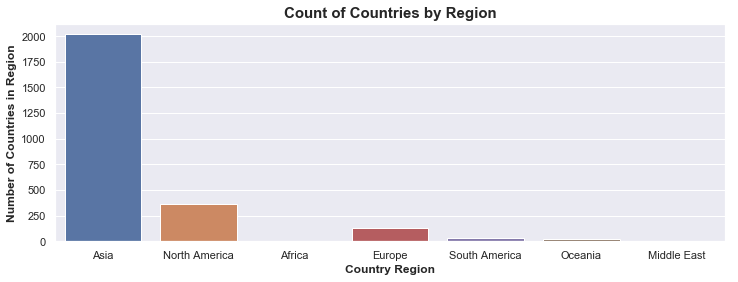

In [66]:
# Asia is the most common region for ramen ratings. 
# The Middle East and AFrica are the least common regions for ramen ratings.

plt.subplots(figsize=(12,4))
sns.countplot(x='Country_Region', data=df)
plt.title('Count of Countries by Region', fontweight = 'bold', fontsize=15)
plt.ylabel('Number of Countries in Region', fontweight='bold')
plt.xlabel('Country Region', fontweight='bold')

In [67]:
# The highest rated ramen brands are Kimura, ORee Garden, The Ramen Rater Select, Komforte Chockolates, and ChoripDong.

df2 = df.groupby('Brand').mean()
df2.sort_values('Stars', ascending = False).head(5)

,Review #,Stars
Brand,,
Kimura,1287.0,5.0
ORee Garden,2043.0,5.0
The Ramen Rater Select,2500.0,5.0
Komforte Chockolates,1155.0,5.0
ChoripDong,1658.0,5.0


In [68]:
# 10 most rated ramen varieties. These could also be viewed as the most popular ramen varieties. 

df4 = df.groupby('Variety').mean()
df4.sort_values('Review #', ascending = False).head(10)

,Review #,Stars
Variety,,
T's Restaurant Tantanmen,2580.0,3.75
Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles,2579.0,1.00
GGE Ramen Snack Tomato Flavor,2577.0,2.75
Singapore Curry,2576.0,3.75
Kimchi song Song Ramen,2575.0,4.75
Spice Deli Tantan Men With Cilantro,2574.0,4.00
Nabeyaki Kitsune Udon,2573.0,3.75
Hokkaido Soy Sauce Ramen,2572.0,0.25
The Original Spicy Stir-Fried Noodles,2571.0,2.50


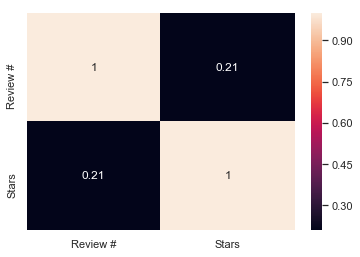

In [69]:
# No correlation between the number of reviews and the rating a ramen brand receives. 

d3 = df2.corr()
sns.heatmap(d3, annot=True)

In [70]:
# The lowest rated ramen brands are Dr. McDougall's, Tiger, Kim Ve Wong, Roland, and US Canning.

df2.sort_values('Stars', ascending = False).tail(5)

,Review #,Stars
Brand,,
Dr. McDougall's,2426.0,0.0
Tiger,293.0,0.0
Kim Ve Wong,43.0,0.0
Roland,2155.5,0.0
US Canning,386.0,0.0


In [71]:
# 10 least rated ramen varieties. These could also be viewed as the least popular ramen varieties. 

df4 = df.groupby('Variety').mean()
df4.sort_values('Review #', ascending = False).tail(10)

,Review #,Stars
Variety,,
Pojangmacha U-dong,15.0,2.5
Hot,14.0,3.5
Chow Mein,13.0,5.0
Chicken Flavor Instant Soup Noodle,11.0,2.0
Vegetable Beef,10.0,1.5
Chinese Beef Instant Rice Noodle,8.0,3.0
Mushroom Pork,7.0,1.0
"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Style InstantÂ RiceÂ Noodles",5.0,3.5
Oriental Style Instant Noodles,4.0,1.0
